In [1]:
from cProfile import label
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the matplotlib figure
plt.rc('axes', titlesize=30, titleweight='bold') #fontsize of the title
plt.rc('axes', labelsize=25) #fontsize of the x and y labels
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels
plt.rc('legend', fontsize=30) #fontsize of the legend

## Memory experiment

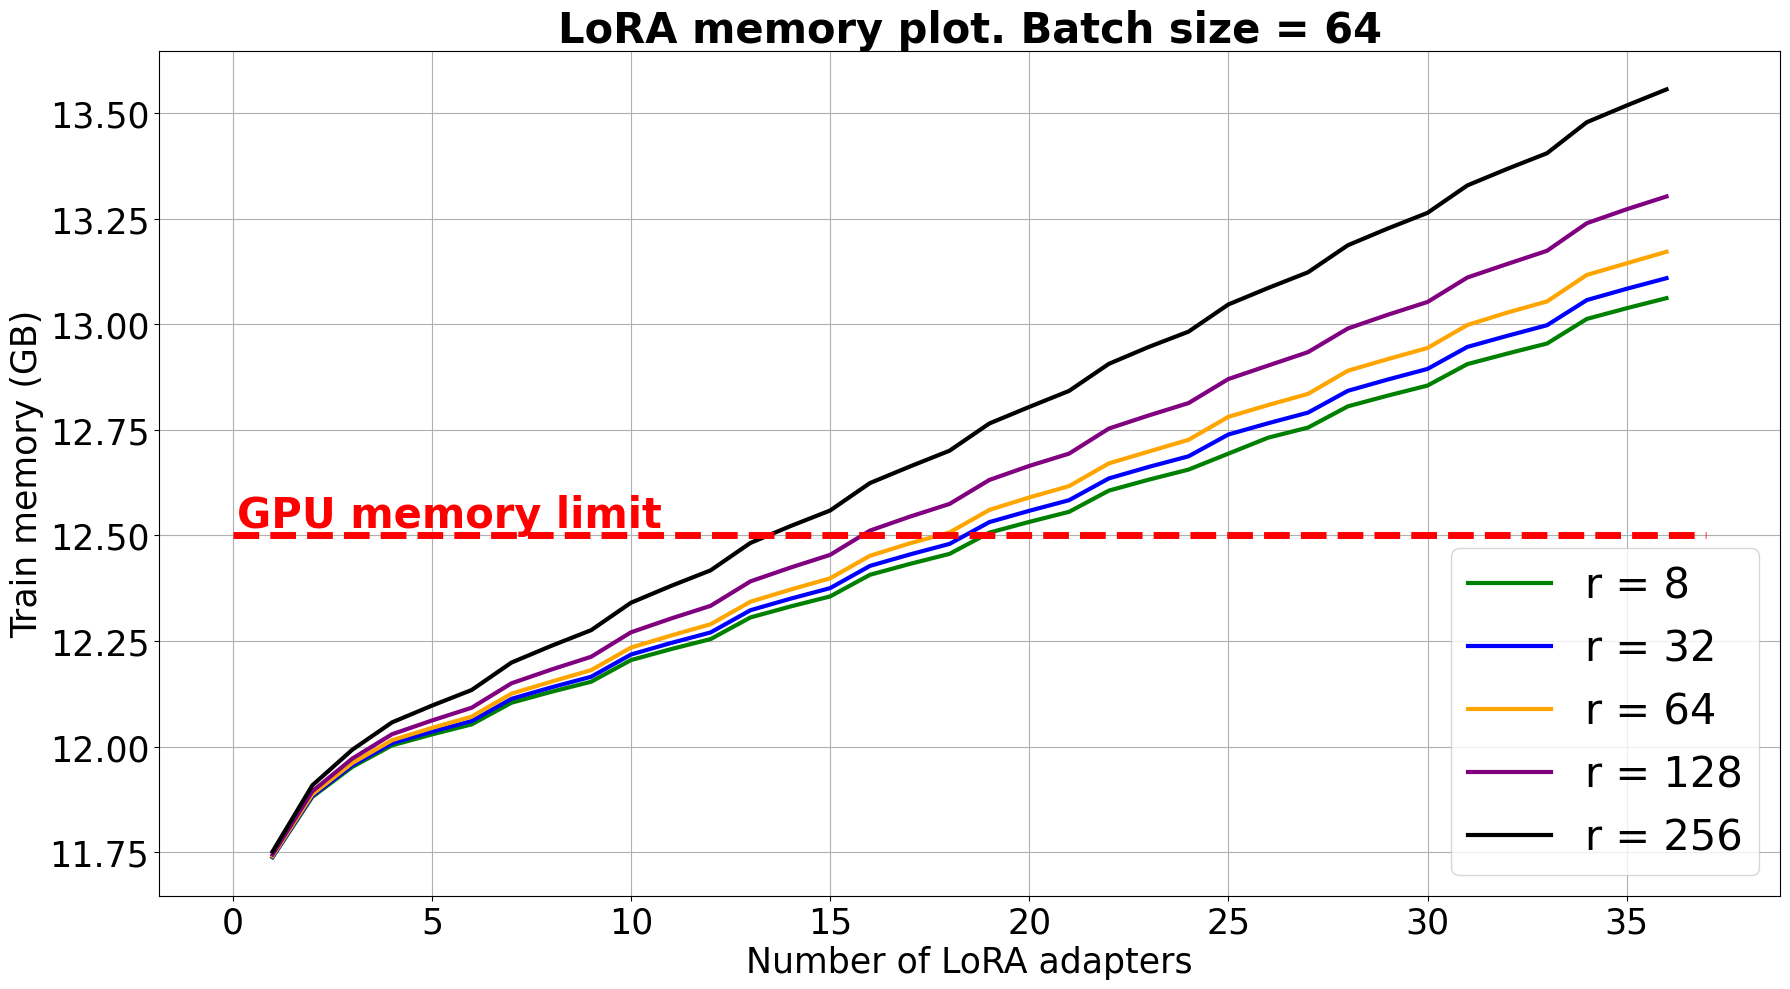

In [97]:
plt.figure(figsize=(18, 10))
bs = 64
#for r in [8, 32, 64, 128, 256]:
colors = ["green", "blue", "orange", "purple", "black"]
for r, color in zip([8, 32, 64, 128, 256], colors):
    x, y = [], []
    with open(f"memory_data/mem_{r}_{bs}.txt", "r") as f:
        a = f.readlines()
    for line in a:
        x.append(int(line.split()[0].split("=")[1][:-1]))
        y.append(float(line.split()[1]))
    plt.plot(x, y, linewidth=3, label=f"r = {r}", color=color)
plt.title(f"LoRA memory plot. Batch size = {64}")
plt.ylabel("Train memory (GB)")
plt.xlabel("Number of LoRA adapters")
memory_limit_gb = 12.5
plt.hlines(y=memory_limit_gb, xmin=0, xmax=37, color="red", 
           linestyles="--", linewidth=5)
plt.text(x=0.1, y=memory_limit_gb+0.02, s="GPU memory limit", color="red",
         fontsize=30, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.legend(loc="lower right")
plt.savefig(f"./figures/lora_memory_bs_{bs}.pdf")
plt.show()